In [1]:
import surprise
import pandas as pd
import numpy as np

In [2]:
data = surprise.Dataset.load_builtin('ml-100k')

In [3]:
df = pd.DataFrame(data.raw_ratings, columns=['user', 'item', 'rate', 'id'])
df

,user,item,rate,id
0,196,242,3.0,881250949
1,186,302,3.0,891717742
2,22,377,1.0,878887116
3,244,51,2.0,880606923
4,166,346,1.0,886397596
...,...,...,...,...
99995,880,476,3.0,880175444
99996,716,204,5.0,879795543
99997,276,1090,1.0,874795795
99998,13,225,2.0,882399156


In [4]:
del df['id']
df.head(5)

,user,item,rate
0,196,242,3.0
1,186,302,3.0
2,22,377,1.0
3,244,51,2.0
4,166,346,1.0


In [5]:
dt = df.set_index(['user', 'item']).unstack()

In [24]:
dt = dt.iloc[0:10, 0:10].fillna('')
dt

rate                                          
item    1 10 100 1000 1001 1002 1003 1004 1005 1006
user                                               
1       5  3   5                                   
10      4      5                                   
100                                                
101     3                                          
102     3                                          
103                                                
104        2   4                                   
105                                                
106     4      3                                   
107

TypeError: Image data of dtype object cannot be converted to float

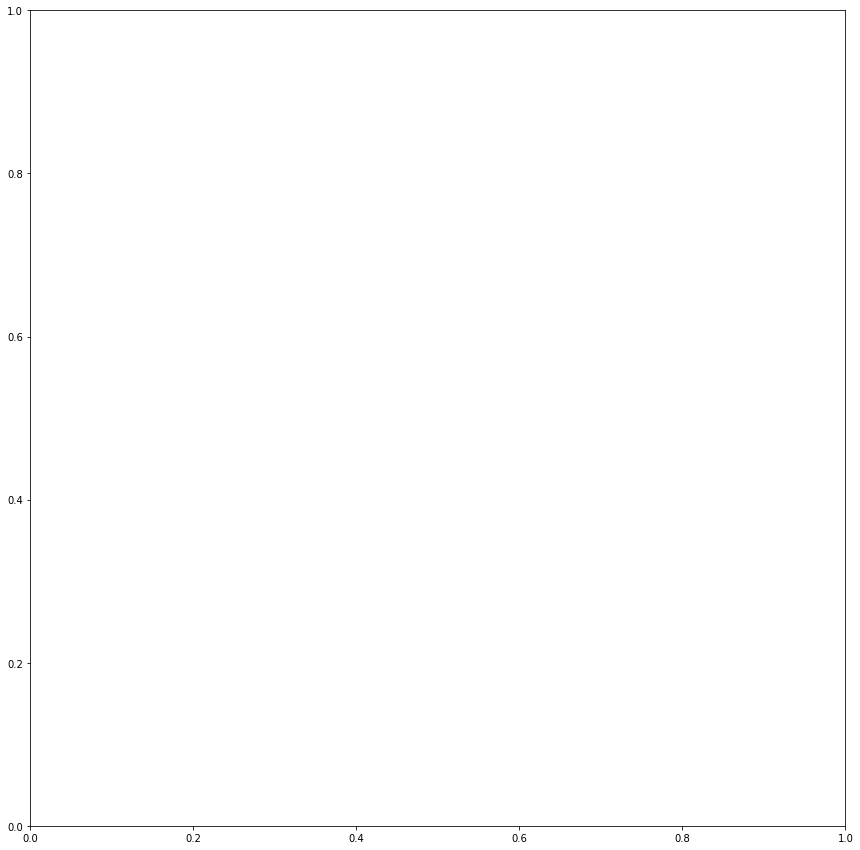

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 15))
plt.imshow(dt)
plt.grid(False)
plt.xlabel('item')
plt.ylabel('user')
plt.title('Rate Matrix')

In [8]:
from surprise.model_selection import KFold

In [26]:
bsl_param = {'method': 'als', 'n_epochs': 6, 'reg_u':12, 'reg_i' : 5}
#n_epoch : dataset 을 몇 번 사용? 하나의 fold에 대해 내부적으로 n_epochs 만큼 테스트한다.
model = surprise.BaselineOnly(bsl_options = bsl_param)

In [27]:
acc = np.zeros(3)
cv = KFold(3) # fold 3개
for i, (trainset, testset) in enumerate(cv.split(data)): # 각각 다른 train set 이 들어가게 된다
    model.fit(trainset)
    pred = model.test(testset)
    acc[i] = surprise.accuracy.rmse(pred, verbose = True)

acc.mean()

Estimating biases using als...
RMSE: 0.9506
Estimating biases using als...
RMSE: 0.9386
Estimating biases using als...
RMSE: 0.9467


0.9453415054914442

In [28]:
from surprise.model_selection import cross_validate
cross_validate(model, data)
#기본 옵션: 5번 돈다. 한 번 돌 때마다 to-be square

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...


{'test_rmse': array([0.9447992 , 0.93769536, 0.94531042, 0.93896696, 0.93807572]),
 'test_mae': array([0.74560357, 0.74369381, 0.74939924, 0.74375278, 0.74308066]),
 'fit_time': (0.14119625091552734,
  0.1729135513305664,
  0.16655611991882324,
  0.16160345077514648,
  0.1655576229095459),
 'test_time': (0.14625334739685059,
  0.09525179862976074,
  0.09674072265625,
  0.14059019088745117,
  0.08591604232788086)}